<a href="https://colab.research.google.com/github/PandukaBandara99/ML-Books/blob/main/Generative_Adversarial_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mahela Panduka Bandara ; <br>
UG @ Dpt. of Electronic & Electrical Engineering ;<br>
University of Peradeniya ;<br>
2024/04 <br>

Email : e19039@end.pdn.ac.lk <br>
LinkedIN : https://www.linkedin.com/in/pandukabandara/

# 1.0 Build Basic Generative Adversarial Networks (GANs)

## 1.1 Intro To GANs

 ### 1.1.1 Generative Models and Discriminative Models

| Aspect                 | Generative Models                                    | Discriminative Models                                 |
|------------------------|------------------------------------------------------|-------------------------------------------------------|
| Objective              | Model the joint probability distribution of input and output variables. | Directly learn the conditional probability distribution of the output given the input. |
| Output                 | Can generate new samples similar to training data.   | Predicts the probability of the output given the input. |
| Use cases              | Image generation, text generation, data generation.  | Classification, regression, anomaly detection.        |
| Training complexity    | Typically more complex.                              | Generally less complex.                               |
| Data efficiency        | Might need more data to capture the entire distribution. | Often requires less data as it focuses on specific aspects. |
| Interpretability      | Often less interpretable due to modeling the entire joint distribution. | Generally more interpretable as it directly models the relationship between input and output. |
| Computation           | Can be more computationally intensive due to modeling complex distributions. | Often less computationally intensive.                |
| Robustness            | Tends to be more robust to noisy or incomplete data. | May struggle with noisy or incomplete data.           |


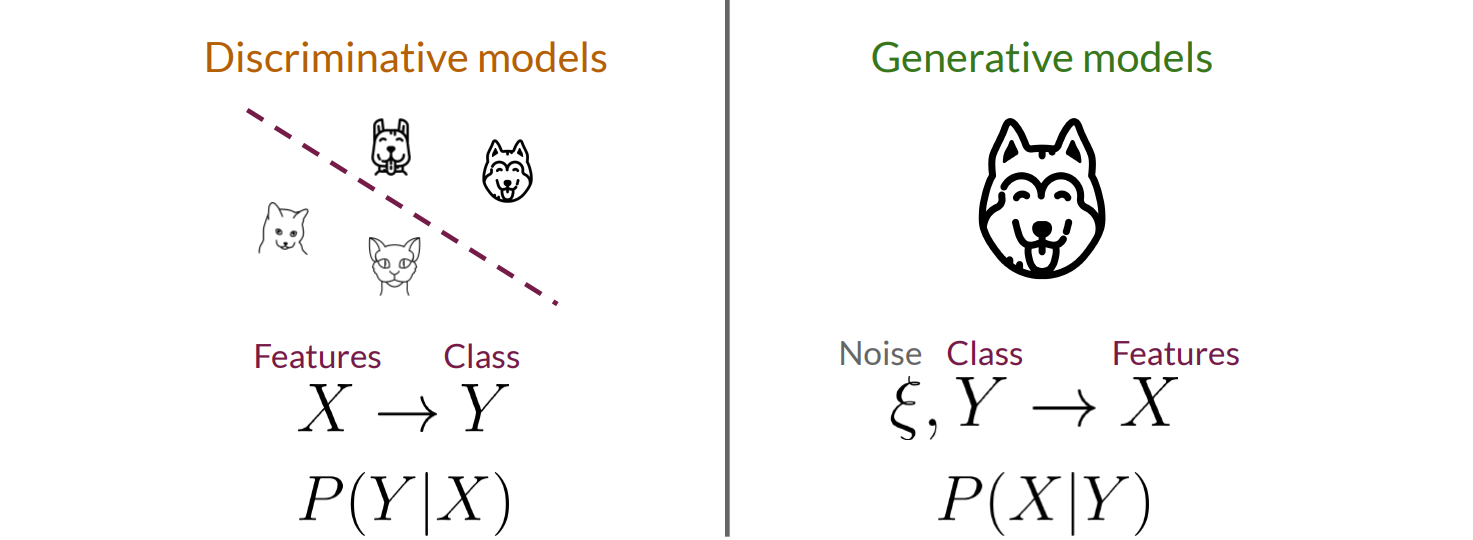

### 1.1.2 Generative Models

| Generative Model          | Model Introduction                                        | Model Parts                                   | Characteristics                                          | Workflow                                   | Use Cases                                                    |
|---------------------------|-----------------------------------------------------------|-----------------------------------------------|----------------------------------------------------------|--------------------------------------------|--------------------------------------------------------------|
| Variational Autoencoder (VAE) | A type of autoencoder that learns to represent input data in a lower-dimensional latent space. It consists of an encoder and a decoder network. | 1. Encoder: Maps input data to a latent space. 2. Latent space: Represents the learned distribution of the input data. 3. Decoder: Reconstructs the input data from the latent space. | - Learns a probabilistic distribution of the input data in the latent space. - Can generate new samples by sampling from the learned distribution. | 1. Encode input data into the latent space. 2. Sample from the latent space. 3. Decode the sampled latent vectors to generate new data. | Image generation, data generation, anomaly detection.           |
| Generative Adversarial Network (GAN) | Comprises two neural networks, a generator and a discriminator, engaged in a minimax game. The generator creates samples to fool the discriminator, which aims to distinguish real from fake samples. | 1. Generator: Creates fake samples from random noise. 2. Discriminator: Distinguishes between real and fake samples. | - Can generate high-quality, diverse samples. - Training can be unstable but often produces impressive results. | 1. The generator creates fake samples. 2. The discriminator evaluates the authenticity of both real and fake samples. 3. Both networks are trained simultaneously in a min-max game. | Image generation, image enhancement, data augmentation.        |
| Generative Adversarial Networks with Variational Inference (VAE-GAN) | Combines the strengths of VAEs and GANs by incorporating a VAE's encoder-decoder structure with a GAN's adversarial training. | 1. Encoder: Maps input data to a latent space. 2. Latent space: Represents the learned distribution of the input data. 3. Generator: Creates fake samples from latent vectors. 4. Discriminator: Distinguishes between real and fake samples. | - Addresses the mode collapse issue of GANs while retaining VAE's ability to learn probabilistic distributions. - Produces high-quality and diverse samples. | 1. The encoder maps input data to the latent space. 2. The generator creates fake samples from the latent space. 3. The discriminator evaluates the authenticity of both real and fake samples. 4. Both networks are trained simultaneously in a min-max game. | Image generation, image synthesis, style transfer.            |
| Autoregressive Models     | Models the conditional probability of each data point given previous data points. Each data point is generated sequentially. | - PixelCNN: Models the conditional probability of each pixel given previous pixels using masked convolutions. - PixelRNN: Similar to PixelCNN but uses recurrent neural networks for modeling dependencies. | - Can generate high-resolution samples with coherent structures. - Sampling is sequential, making it slower for large datasets. | 1. Train the model to predict the next data point given previous data points. 2. Sample sequentially to generate new data. | Image generation, text generation, speech synthesis.          |
| Flow-Based Models         | Learns a invertible mapping from a simple distribution (e.g., Gaussian) to the data distribution. Samples are generated by transforming samples from the simple distribution. | - Affine transformations: Scale and translation applied element-wise. - Permutation transformations: Rearranges dimensions. - Coupling transformations: Splits and recombines dimensions. | - Efficient sampling and likelihood estimation. - Invertible mapping allows exact likelihood computation. | 1. Train the model to transform samples from a simple distribution to match the data distribution. 2. Sample from the simple distribution and apply the learned transformations to generate new samples. | Image generation, data generation, density estimation.        |



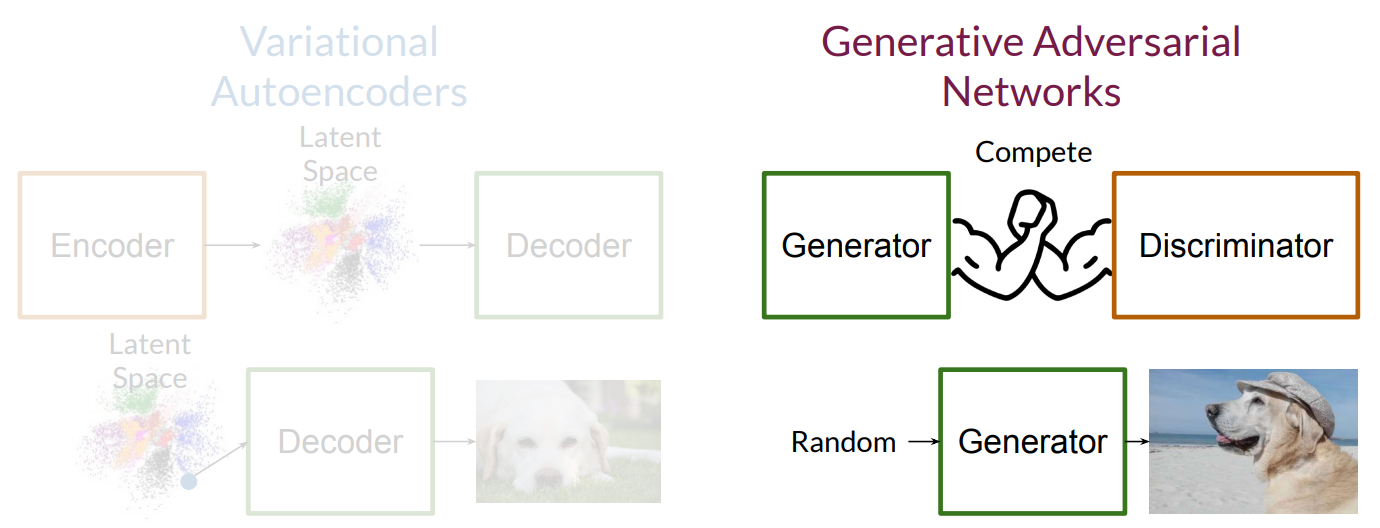

### 1.1.3 The Generator and the Discriminator

In a Generative Adversarial Network (GAN), the generator creates realistic data samples from random noise, aiming to mimic the real data distribution, while the discriminator evaluates these samples, distinguishing between real and generated data, providing feedback to the generator to improve its output.

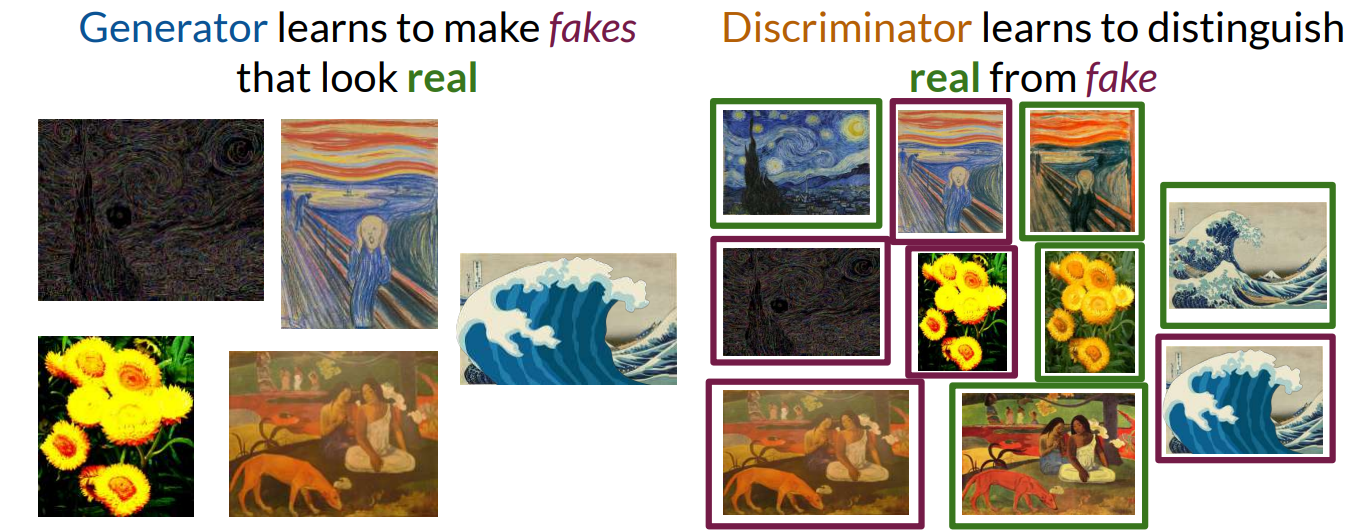

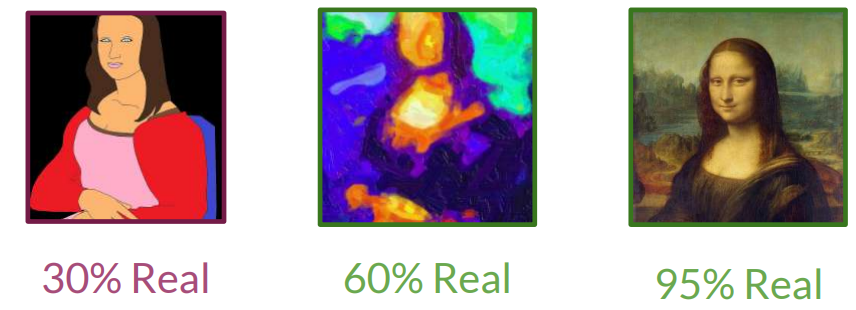

#### The Discriminator

**Classifiers (training)**


Classifiers - distinguish between different classes

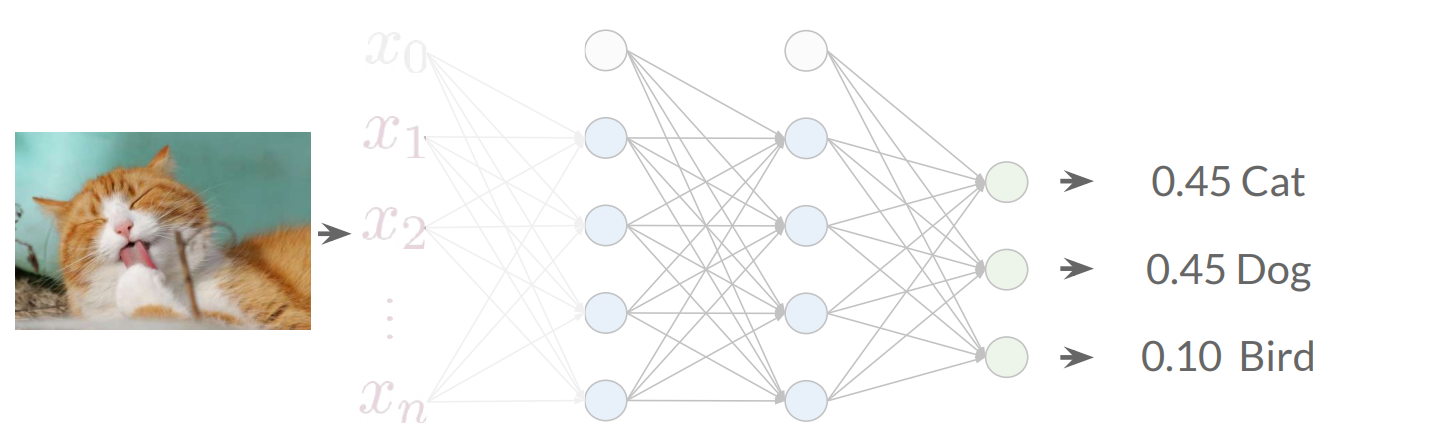

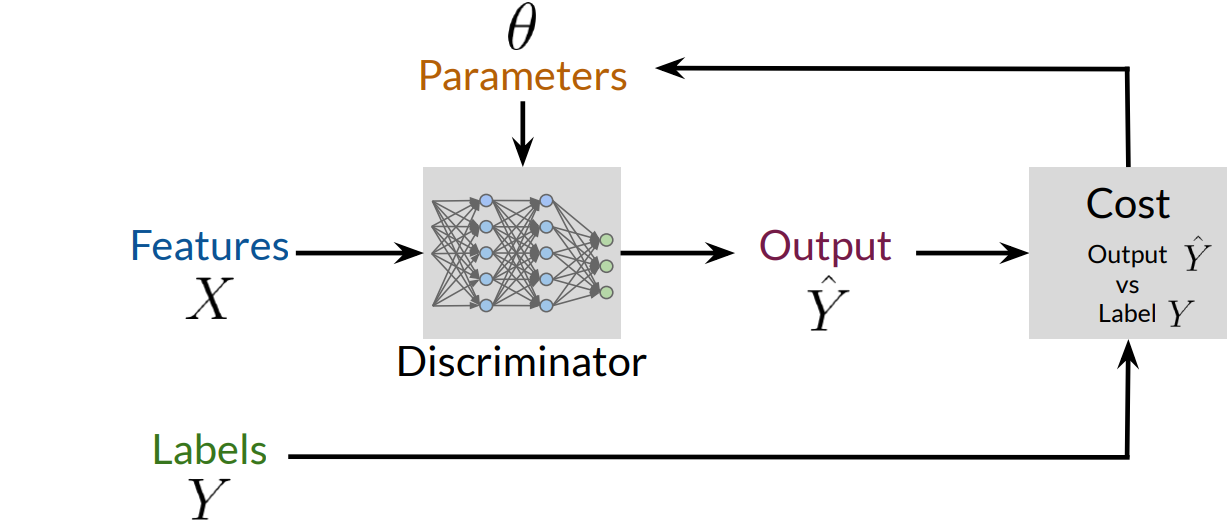

Suppose we have a set of features representing an image, denoted as $\mathbf{x} $, and we want to classify whether the image contains a cat or a dog. We'll use conditional probability to estimate the probability of each class given the features.

Let's denote:
- $ P(\text{cat} | \mathbf{x}) $ as the probability that the image contains a cat given the features $ \mathbf{x} $.
- $ P(\text{dog} | \mathbf{x}) $ as the probability that the image contains a dog given the features $ \mathbf{x} $.

We can use a classifier such as logistic regression or a neural network with softmax activation to estimate these probabilities.

For example, in logistic regression, we can compute the logits (unnormalized scores) for each class using a linear transformation followed by a bias term:

$$ z_{\text{cat}} = \mathbf{w}_{\text{cat}}^T \mathbf{x} + b_{\text{cat}} $$
$$ z_{\text{dog}} = \mathbf{w}_{\text{dog}}^T \mathbf{x} + b_{\text{dog}} $$

Here, $ \mathbf{w}_{\text{cat}} $ and $ \mathbf{w}_{\text{dog}} $ are weight vectors and $ b_{\text{cat}} $ and $ b_{\text{dog}} $ are bias terms specific to the cat and dog classes, respectively.

We then apply the softmax function to convert these logits into probabilities:

$$ P(\text{cat} | \mathbf{x}) = \frac{e^{z_{\text{cat}}}}{e^{z_{\text{cat}}} + e^{z_{\text{dog}}}} $$
$$ P(\text{dog} | \mathbf{x}) = \frac{e^{z_{\text{dog}}}}{e^{z_{\text{cat}}} + e^{z_{\text{dog}}}} $$



**Discriminator**


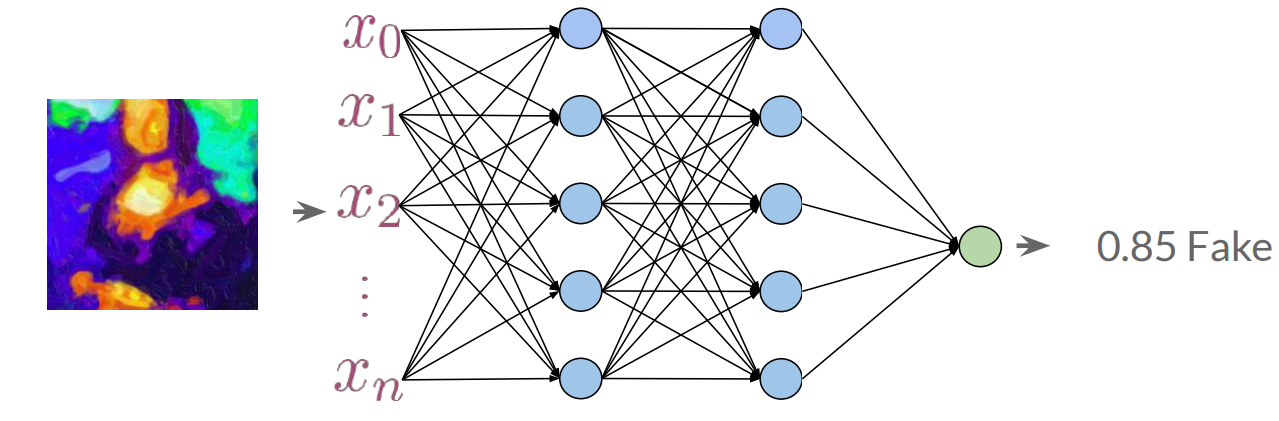

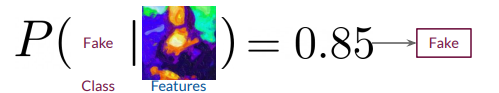

#### Generators

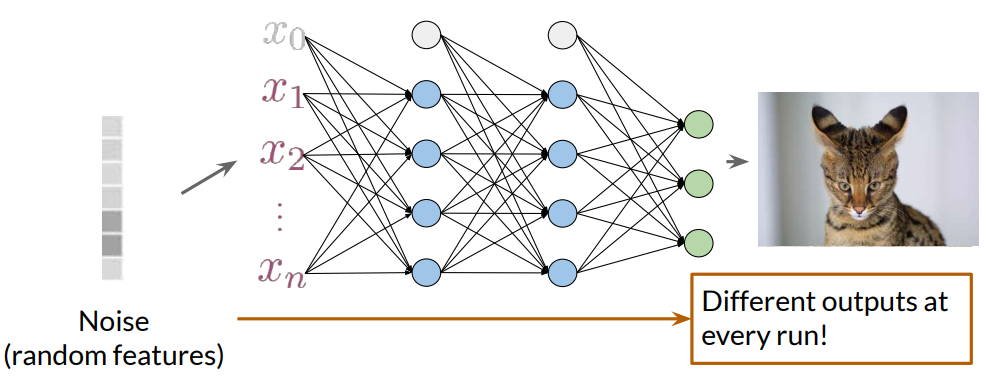

Learning of the Generator

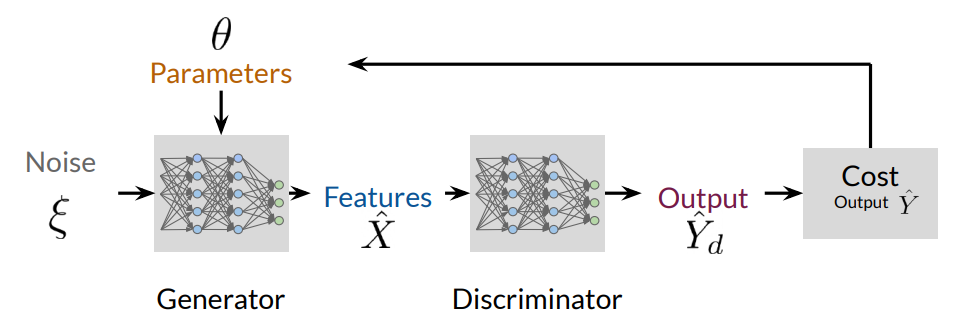

After the weights are determined, the model can be used to sample.

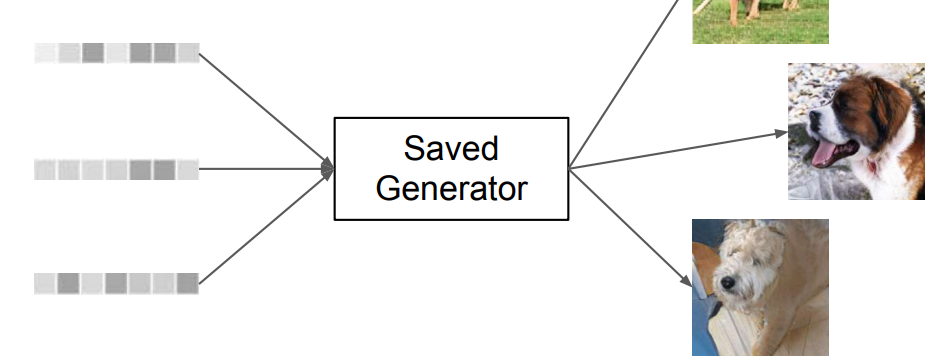

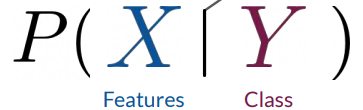

### 1.1.4 Binary Cross Entropy (BCE) Loss equation

Binary Cross Entropy (BCE) Loss, also known as Log Loss, is a popular loss function used in binary classification tasks. It measures the difference between two probability distributions, typically predicted probabilities and actual labels, and is widely employed in machine learning algorithms, especially in scenarios where the output is binary (e.g., classifying an email as spam or not spam).

**Mathematical Equation:**
The BCE Loss function is defined mathematically as follows:

$$ BCE(y, \hat{y}) = - \frac{1}{N} \sum_{i=1}^{N} [y_i \cdot \log(\hat{y}_i) + (1 - y_i) \cdot \log(1 - \hat{y}_i)] $$

Here,
- $y$ represents the true labels (0 or 1) of the binary classification task.
- $\hat{y}$ represents the predicted probabilities generated by the model.
- $N$ is the total number of samples in the dataset.

**Explanation of the Equation:**
- The BCE Loss function computes the average difference between the predicted probabilities $ hat{y}_i $ and the true labels $ y_i$.
- For each sample $i$, the loss is computed as the sum of two terms:
  1. $y_i \cdot \log(\hat{y}_i)$ This term penalizes the model heavily if the true label is 1 $(y_i = 1)$ but the predicted probability is low $(\hat{y}_i \approx 0)$.
  2. $(1 - y_i) \cdot \log(1 - \hat{y}_i)$: This term penalizes the model if the true label is 0 $(y_i = 0)$ but the predicted probability is high $(\hat{y}_i \approx 1)$.
- The negative sign at the beginning ensures that the loss value is always positive.


The "Superior Discriminator" issue in Generative Adversarial Networks (GANs) arises when the discriminator becomes too effective at distinguishing between real and generated samples, causing the generator to struggle to improve. This can lead to training instability and mode collapse, where the generator produces limited varieties of samples.

### 1.1.5 Introduction to PyTorch

#### PyTorch vs TensorFlow


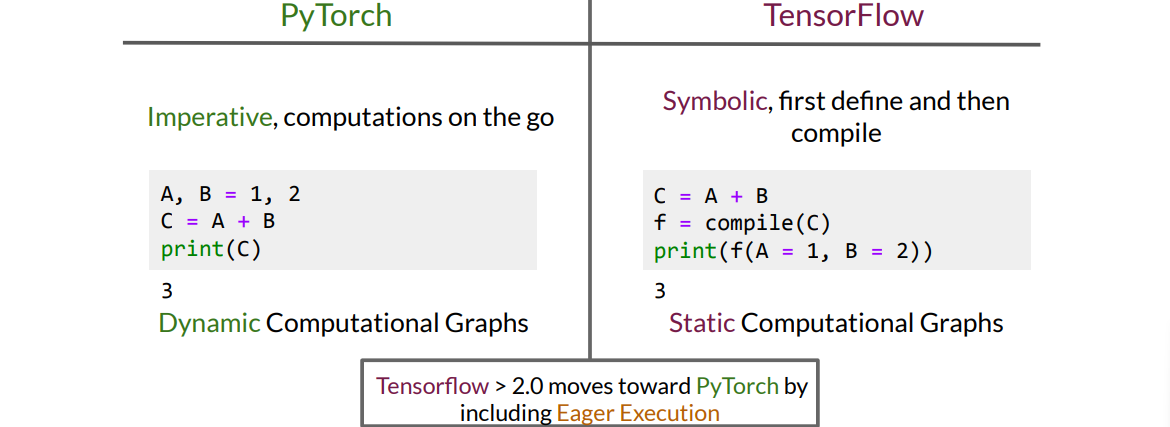

#### Installation:

In [ ]:
# For CPU only
#pip install torch torchvision

# For GPU support (CUDA version should match your GPU driver)
#pip install torch torchvision torchaudio cudatoolkit=11.2 -c pytorch

####  Tensor Basics:

PyTorch tensors are similar to NumPy arrays but with GPU acceleration. Let's create a simple tensor and perform some basic operations:


In [ ]:
import torch

# Create a tensor
x = torch.tensor([[1, 2], [3, 4]])

# Display tensor
print(x)

# Tensor shape
print(x.shape)

# Tensor operations
y = torch.tensor([[5, 6], [7, 8]])
z = x + y
print(z)

tensor([[1, 2],
        [3, 4]])
torch.Size([2, 2])
tensor([[ 6,  8],
        [10, 12]])


#### Autograd:

PyTorch's autograd package provides automatic differentiation for all operations on Tensors. Let's see a simple example:

In [ ]:
import torch

# Create a tensor with requires_grad=True to track computation
x = torch.tensor([1.0, 2.0], requires_grad=True)

# Perform operations
y = x ** 2
z = y.sum()

# Compute gradients
z.backward()

# Access gradients
print(x.grad)

tensor([2., 4.])


####  Neural Networks:

PyTorch provides the `torch.nn` module for building neural networks. Let's create a simple neural network:

In [ ]:
import torch
import torch.nn as nn

# Define a neural network
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc = nn.Linear(10, 1)  # 10 input features, 1 output

    def forward(self, x):
        return self.fc(x)

# Instantiate the model
model = Net()

# Input data
input_data = torch.randn(5, 10)  # Batch size = 5, 10 features

# Forward pass
output = model(input_data)
print(output)

tensor([[-0.1381],
        [-0.4525],
        [-0.5214],
        [ 0.2889],
        [-0.2915]], grad_fn=<AddmmBackward0>)


####  Training Loop:

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

# Define a simple dataset
X = torch.randn(100, 10)  # 100 samples, 10 features
y = torch.randn(100, 1)    # 100 samples, 1 output

# Define a neural network
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc = nn.Linear(10, 1)  # 10 input features, 1 output

    def forward(self, x):
        return self.fc(x)

# Instantiate the model
model = Net()

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Training loop
epochs = 100
for epoch in range(epochs):
    # Forward pass
    outputs = model(X)
    loss = criterion(outputs, y)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

Epoch [10/100], Loss: 1.2603
Epoch [20/100], Loss: 1.1766
Epoch [30/100], Loss: 1.1219
Epoch [40/100], Loss: 1.0857
Epoch [50/100], Loss: 1.0614
Epoch [60/100], Loss: 1.0449
Epoch [70/100], Loss: 1.0334
Epoch [80/100], Loss: 1.0253
Epoch [90/100], Loss: 1.0196
Epoch [100/100], Loss: 1.0154


#### Sequential Model

In [ ]:
import torch
import torch.nn as nn

# Define a sequential model
model = nn.Sequential(
    nn.Linear(10, 20),  # Input size: 10, Output size: 20
    nn.ReLU(),          # Activation function: ReLU
    nn.Linear(20, 1)    # Input size: 20, Output size: 1
)

# Input data
input_data = torch.randn(5, 10)  # Batch size = 5, 10 input features

# Forward pass
output = model(input_data)
print(output)

tensor([[0.8141],
        [0.2699],
        [0.3988],
        [0.3022],
        [0.3506]], grad_fn=<AddmmBackward0>)


### 1.1.6 GAN for Digit Writing

#### Imports

In [ ]:
import torch
from torch import nn
from tqdm.auto import tqdm
from torchvision import transforms
from torchvision.datasets import MNIST # Training dataset
from torchvision.utils import make_grid
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
torch.manual_seed(0) # Set for testing purposes, please do not change!

def show_tensor_images(image_tensor, num_images=25, size=(1, 28, 28)):
    '''
    Function for visualizing images: Given a tensor of images, number of images, and
    size per image, plots and prints the images in a uniform grid.
    '''
    image_unflat = image_tensor.detach().cpu().view(-1, *size)
    image_grid = make_grid(image_unflat[:num_images], nrow=5)
    plt.imshow(image_grid.permute(1, 2, 0).squeeze())
    plt.show()

#### Generator
The first step is to build the generator component.

Start by creating a function to make a single layer/block for the generator's neural network. Each block should include a [linear transformation](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html) to map to another shape, a [batch normalization](https://pytorch.org/docs/stable/generated/torch.nn.BatchNorm1d.html) for stabilization, and finally a non-linear activation function (you use a [ReLU here](https://pytorch.org/docs/master/generated/torch.nn.ReLU.html)) so the output can be transformed in complex ways.

In [ ]:
def get_generator_block(input_dim, output_dim):
    '''
    Function for returning a block of the generator's neural network
    given input and output dimensions.
    Parameters:
        input_dim: the dimension of the input vector, a scalar
        output_dim: the dimension of the output vector, a scalar
    Returns:
        a generator neural network layer, with a linear transformation
          followed by a batch normalization and then a relu activation
    '''
    return nn.Sequential(
        nn.Linear(input_dim, output_dim),
        nn.BatchNorm1d(output_dim),
        nn.ReLU(inplace=True)
    )

In [ ]:
class Generator(nn.Module):
    '''
    Generator Class
    Values:
        z_dim: the dimension of the noise vector, a scalar
        im_dim: the dimension of the images, fitted for the dataset used, a scalar
          (MNIST images are 28 x 28 = 784 so that is your default)
        hidden_dim: the inner dimension, a scalar
    '''
    def __init__(self, z_dim=10, im_dim=784, hidden_dim=128):
        super(Generator, self).__init__()
        # Build the neural network
        self.gen = nn.Sequential(
            get_generator_block(z_dim, hidden_dim),
            get_generator_block(hidden_dim, hidden_dim * 2),
            get_generator_block(hidden_dim * 2, hidden_dim * 4),
            get_generator_block(hidden_dim * 4, hidden_dim * 8),
            # There is a dropdown with hints if you need them!
            nn.Linear(hidden_dim * 8, im_dim),
            nn.Sigmoid()
        )
    def forward(self, noise):
        '''
        Function for completing a forward pass of the generator: Given a noise tensor,
        returns generated images.
        Parameters:
            noise: a noise tensor with dimensions (n_samples, z_dim)
        '''
        return self.gen(noise)

    # Needed for grading
    def get_gen(self):
        '''
        Returns:
            the sequential model
        '''
        return self.gen

#### Noise

In [ ]:
def get_noise(n_samples, z_dim, device='cpu'):
    '''
    Function for creating noise vectors: Given the dimensions (n_samples, z_dim),
    creates a tensor of that shape filled with random numbers from the normal distribution.
    Parameters:
        n_samples: the number of samples to generate, a scalar
        z_dim: the dimension of the noise vector, a scalar
        device: the device type
    '''
    # NOTE: To use this on GPU with device='cuda', make sure to pass the device
    # argument to the function you use to generate the noise.
    return torch.randn(n_samples, z_dim, device=device)

#### Discriminator


The second component that need to construct is the discriminator. As with the generator component, start by creating a function that builds a neural network block for the discriminator.

*Note: use leaky ReLUs to prevent the "dying ReLU" problem, which refers to the phenomenon where the parameters stop changing due to consistently negative values passed to a ReLU, which result in a zero gradient.

In [ ]:
def get_discriminator_block(input_dim, output_dim):
    '''
    Discriminator Block
    Function for returning a neural network of the discriminator given input and output dimensions.
    Parameters:
        input_dim: the dimension of the input vector, a scalar
        output_dim: the dimension of the output vector, a scalar
    Returns:
        a discriminator neural network layer, with a linear transformation
          followed by an nn.LeakyReLU activation with negative slope of 0.2
          (https://pytorch.org/docs/master/generated/torch.nn.LeakyReLU.html)
    '''
    return nn.Sequential(
        nn.Linear(input_dim, output_dim),
        nn.LeakyReLU(0.2, inplace=True)
        )

In [ ]:
class Discriminator(nn.Module):
    '''
    Discriminator Class
    Values:
        im_dim: the dimension of the images, fitted for the dataset used, a scalar
            (MNIST images are 28x28 = 784 so that is your default)
        hidden_dim: the inner dimension, a scalar
    '''
    def __init__(self, im_dim=784, hidden_dim=128):
        super(Discriminator, self).__init__()
        self.disc = nn.Sequential(
            get_discriminator_block(im_dim, hidden_dim * 4),
            get_discriminator_block(hidden_dim * 4, hidden_dim * 2),
            get_discriminator_block(hidden_dim * 2, hidden_dim),
            # Hint: You want to transform the final output into a single value,
            #       so add one more linear map.
            nn.Linear(hidden_dim, 1)
        )

    def forward(self, image):
        '''
        Function for completing a forward pass of the discriminator: Given an image tensor,
        returns a 1-dimension tensor representing fake/real.
        Parameters:
            image: a flattened image tensor with dimension (im_dim)
        '''
        return self.disc(image)

    # Needed for grading
    def get_disc(self):
        '''
        Returns:
            the sequential model
        '''
        return self.disc

####Training


First, set parameters:
  *   criterion: the loss function
  *   n_epochs: the number of times you iterate through the entire dataset when training
  *   z_dim: the dimension of the noise vector
  *   display_step: how often to display/visualize the images
  *   batch_size: the number of images per forward/backward pass
  *   lr: the learning rate
  *   device: the device type, here using a GPU (which runs CUDA), not CPU

In [ ]:
# Set parameters
criterion = nn.BCEWithLogitsLoss()
n_epochs = 200
z_dim = 64
display_step = 500
batch_size = 128
lr = 0.00001

# Load MNIST dataset as tensors
dataloader = DataLoader(
    MNIST('.', download=True, transform=transforms.ToTensor()),
    batch_size=batch_size,
    shuffle=True)


device = 'cuda'

Now, initialize the generator, discriminator, and optimizers. Note that each optimizer only takes the parameters of one particular model, since want each optimizer to optimize only one of the models.

In [ ]:
gen = Generator(z_dim).to(device)
gen_opt = torch.optim.Adam(gen.parameters(), lr=lr)
disc = Discriminator().to(device)
disc_opt = torch.optim.Adam(disc.parameters(), lr=lr)

In [ ]:
def get_disc_loss(gen, disc, criterion, real, num_images, z_dim, device):
    '''
    Return the loss of the discriminator given inputs.
    Parameters:
        gen: the generator model, which returns an image given z-dimensional noise
        disc: the discriminator model, which returns a single-dimensional prediction of real/fake
        criterion: the loss function, which should be used to compare
               the discriminator's predictions to the ground truth reality of the images
               (e.g. fake = 0, real = 1)
        real: a batch of real images
        num_images: the number of images the generator should produce,
                which is also the length of the real images
        z_dim: the dimension of the noise vector, a scalar
        device: the device type
    Returns:
        disc_loss: a torch scalar loss value for the current batch
    '''
    #     These are the steps you will need to complete:
    #       1) Create noise vectors and generate a batch (num_images) of fake images.
    #            Make sure to pass the device argument to the noise.
    #       2) Get the discriminator's prediction of the fake image
    #            and calculate the loss. Don't forget to detach the generator!
    #            (Remember the loss function you set earlier -- criterion. You need a
    #            'ground truth' tensor in order to calculate the loss.
    #            For example, a ground truth tensor for a fake image is all zeros.)
    #       3) Get the discriminator's prediction of the real image and calculate the loss.
    #       4) Calculate the discriminator's loss by averaging the real and fake loss
    #            and set it to disc_loss.
    #     *Important*: You should NOT write your own loss function here - use criterion(pred, true)!
    fake_noise = get_noise(num_images, z_dim, device=device)
    fake = gen(fake_noise)
    disc_fake_pred = disc(fake.detach())
    disc_fake_loss = criterion(disc_fake_pred, torch.zeros_like(disc_fake_pred))
    disc_real_pred = disc(real)
    disc_real_loss = criterion(disc_real_pred, torch.ones_like(disc_real_pred))
    disc_loss = (disc_fake_loss + disc_real_loss) / 2
    return disc_loss

In [ ]:
def get_gen_loss(gen, disc, criterion, num_images, z_dim, device):
    '''
    Return the loss of the generator given inputs.
    Parameters:
        gen: the generator model, which returns an image given z-dimensional noise
        disc: the discriminator model, which returns a single-dimensional prediction of real/fake
        criterion: the loss function, which should be used to compare
               the discriminator's predictions to the ground truth reality of the images
               (e.g. fake = 0, real = 1)
        num_images: the number of images the generator should produce,
                which is also the length of the real images
        z_dim: the dimension of the noise vector, a scalar
        device: the device type
    Returns:
        gen_loss: a torch scalar loss value for the current batch
    '''
    #     These are the steps you will need to complete:
    #       1) Create noise vectors and generate a batch of fake images.
    #           Remember to pass the device argument to the get_noise function.
    #       2) Get the discriminator's prediction of the fake image.
    #       3) Calculate the generator's loss. Remember the generator wants
    #          the discriminator to think that its fake images are real
    #     *Important*: You should NOT write your own loss function here - use criterion(pred, true)!
    fake_noise = get_noise(num_images, z_dim, device=device)
    fake = gen(fake_noise)
    disc_fake_pred = disc(fake)
    gen_loss = criterion(disc_fake_pred, torch.ones_like(disc_fake_pred))
    return gen_loss

In [ ]:
cur_step = 0
mean_generator_loss = 0
mean_discriminator_loss = 0
test_generator = True # Whether the generator should be tested
gen_loss = False
error = False
for epoch in range(n_epochs):

    # Dataloader returns the batches
    for real, _ in tqdm(dataloader):
        cur_batch_size = len(real)

        # Flatten the batch of real images from the dataset
        real = real.view(cur_batch_size, -1).to(device)

        ### Update discriminator ###
        # Zero out the gradients before backpropagation
        disc_opt.zero_grad()

        # Calculate discriminator loss
        disc_loss = get_disc_loss(gen, disc, criterion, real, cur_batch_size, z_dim, device)

        # Update gradients
        disc_loss.backward(retain_graph=True)

        # Update optimizer
        disc_opt.step()

        # For testing purposes, to keep track of the generator weights
        if test_generator:
            old_generator_weights = gen.gen[0][0].weight.detach().clone()

        ### Update generator ###
        #     Hint: This code will look a lot like the discriminator updates!
        #     These are the steps you will need to complete:
        #       1) Zero out the gradients.
        #       2) Calculate the generator loss, assigning it to gen_loss.
        #       3) Backprop through the generator: update the gradients and optimizer.
        #### START CODE HERE ####
        gen_opt.zero_grad()
        gen_loss = get_gen_loss(gen, disc, criterion, cur_batch_size, z_dim, device)
        gen_loss.backward()
        gen_opt.step()
        #### END CODE HERE ####

        # For testing purposes, to check that your code changes the generator weights
        if test_generator:
            try:
                assert lr > 0.0000002 or (gen.gen[0][0].weight.grad.abs().max() < 0.0005 and epoch == 0)
                assert torch.any(gen.gen[0][0].weight.detach().clone() != old_generator_weights)
            except:
                error = True
                print("Runtime tests have failed")

        # Keep track of the average discriminator loss
        mean_discriminator_loss += disc_loss.item() / display_step

        # Keep track of the average generator loss
        mean_generator_loss += gen_loss.item() / display_step

        ### Visualization code ###
        if cur_step % display_step == 0 and cur_step > 0:
            print(f"Step {cur_step}: Generator loss: {mean_generator_loss}, discriminator loss: {mean_discriminator_loss}")
            fake_noise = get_noise(cur_batch_size, z_dim, device=device)
            fake = gen(fake_noise)
            show_tensor_images(fake)
            show_tensor_images(real)
            mean_generator_loss = 0
            mean_discriminator_loss = 0
        cur_step += 1


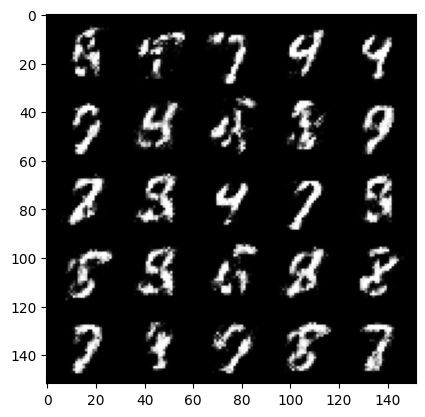

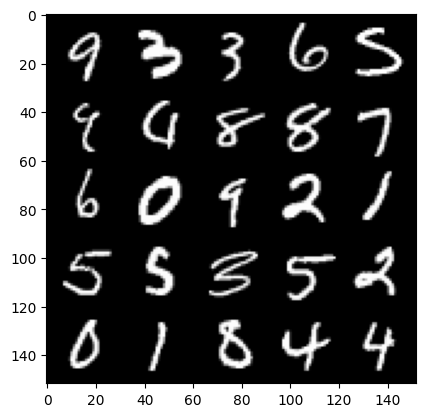

## 1.2 Deep Convolution GAN

### 1.2.1 Activation Function

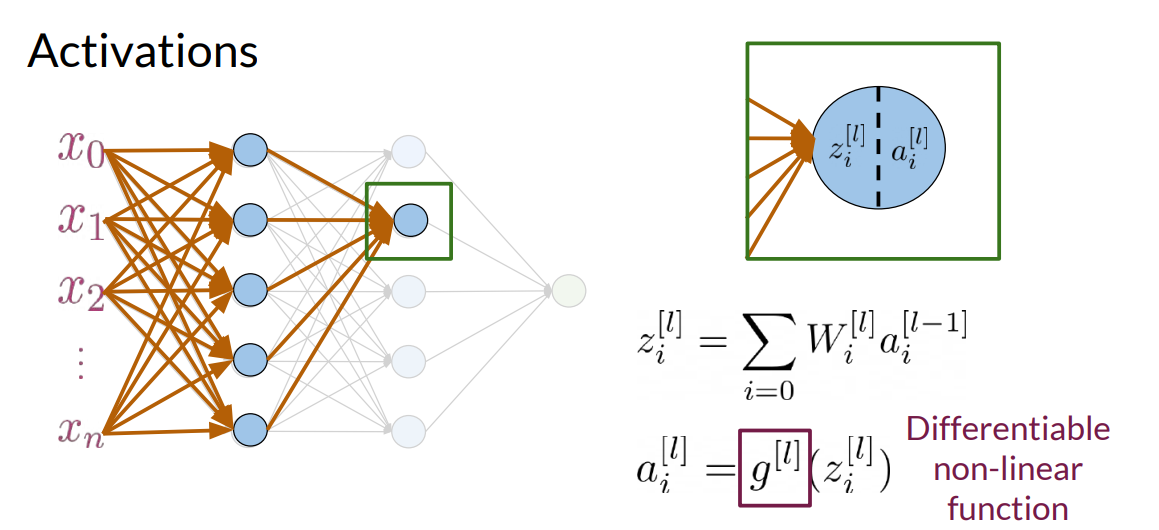

Activation functions should be Non linear to be differentiable. Otherwise the whole nural network can be simplified into a linear regression model.So it will not be able to capture the benifits of Deep Nural Networks.

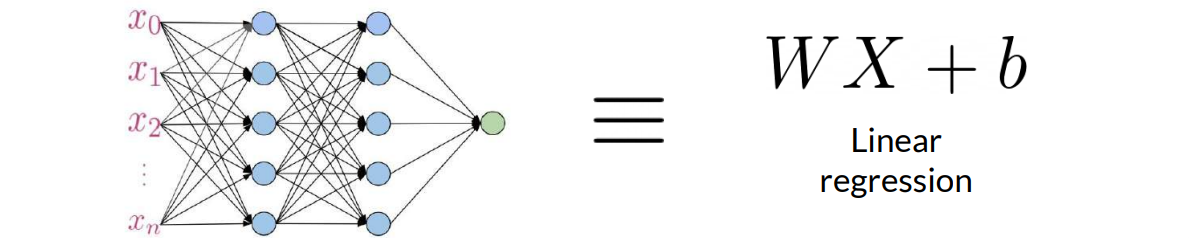

### 1.2.2 Dying Dying ReLU Problem

The "Dying ReLU" problem refers to a situation in which ReLU (Rectified Linear Unit) neurons become inactive, effectively "dying," and always outputting zero for any input. This problem can occur when the weights and biases of the neurons are updated in such a way that the neuron always outputs zero for all inputs during the training process.

ReLU is one of the most widely used activation functions in neural networks because of its simplicity and effectiveness. It replaces all negative values in the input with zero, leaving positive values unchanged:

$$f(x) = \max(0, x)$$

However, during the training of neural networks using gradient-based optimization algorithms like stochastic gradient descent (SGD), weights and biases are updated based on the gradients of the loss function with respect to these parameters. In the case of ReLU neurons, if a large gradient flows through a neuron during training and updates the weights in such a way that the neuron consistently outputs negative values for all inputs, the neuron effectively "dies" because it will always output zero due to the ReLU activation function. ( Not differentiable when <0 [Vanishing Gradient])

There are several reasons why the Dying ReLU problem might occur:

1. **Vanishing Gradient**: If the learning rate is too high or too low, it can cause the gradients to become very small, effectively vanishing. This can prevent the weights from being updated properly, leading to neurons getting stuck in an inactive state.

2. **Unbalanced Initialization**: If the weights of a neuron are initialized in such a way that the neuron always outputs negative values for all inputs, it can lead to the Dying ReLU problem.

3. **Dead Neurons in Large Networks**: In large neural networks, it's common for some neurons to become inactive due to the sheer complexity of the network and the interplay between different neurons. If too many neurons become inactive, it can lead to a degradation in network performance.


**Using Leaky ReLU , this problem can be solved**

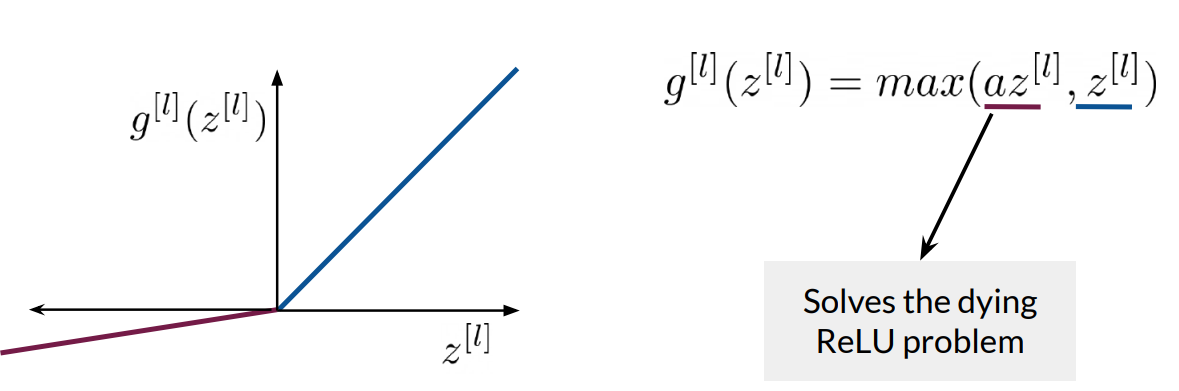

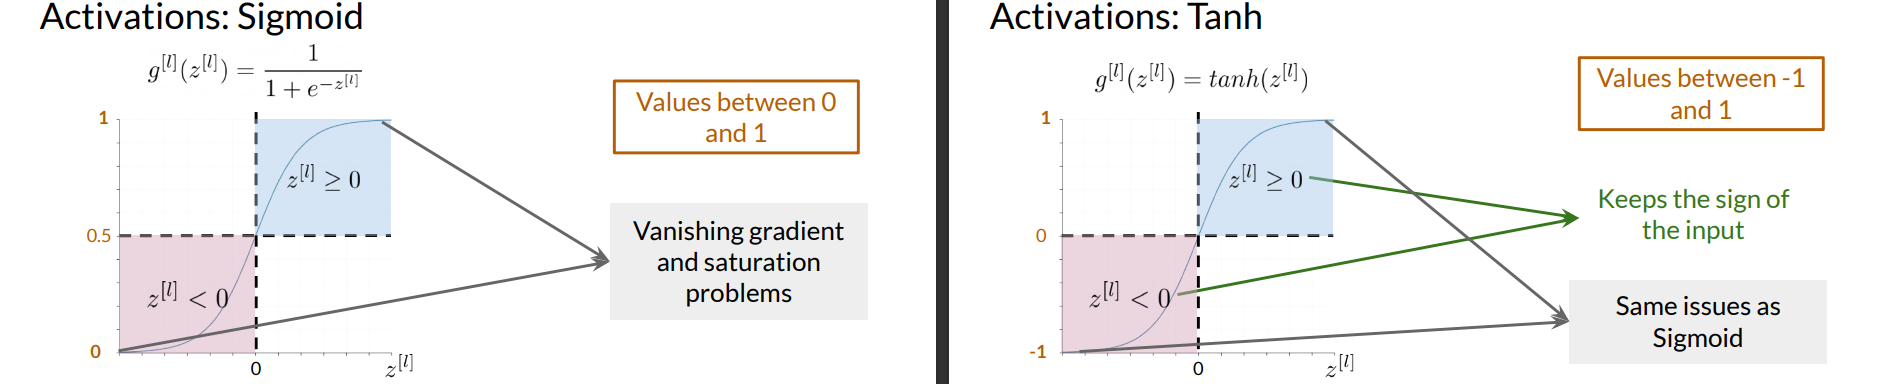

### 1.2.3 Batch Normalization

#### Covariate Shift

Covariate shift refers to a situation in which the distribution of input features (covariates) changes between the training and testing phases of a machine learning model. In other words, the relationship between the input features and the target variable remains the same, but the distribution of the input features itself shifts. This can lead to a degradation in the performance of the model because it assumes that the training and testing data come from the same distribution, which may not be the case.

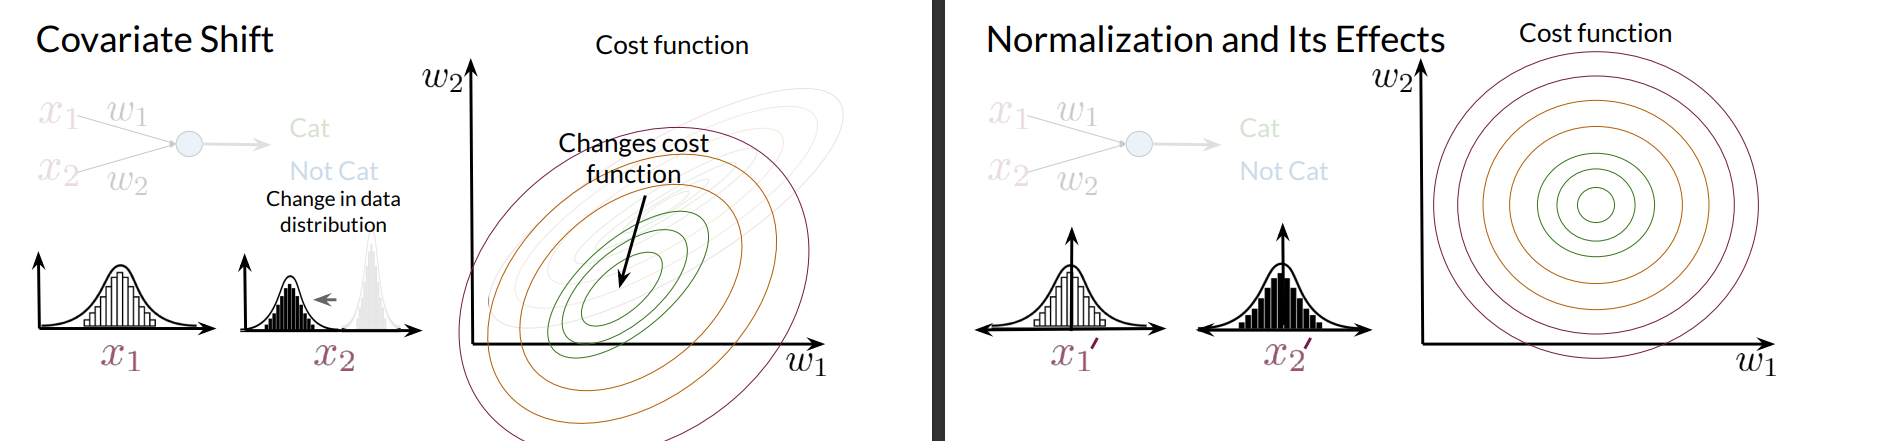

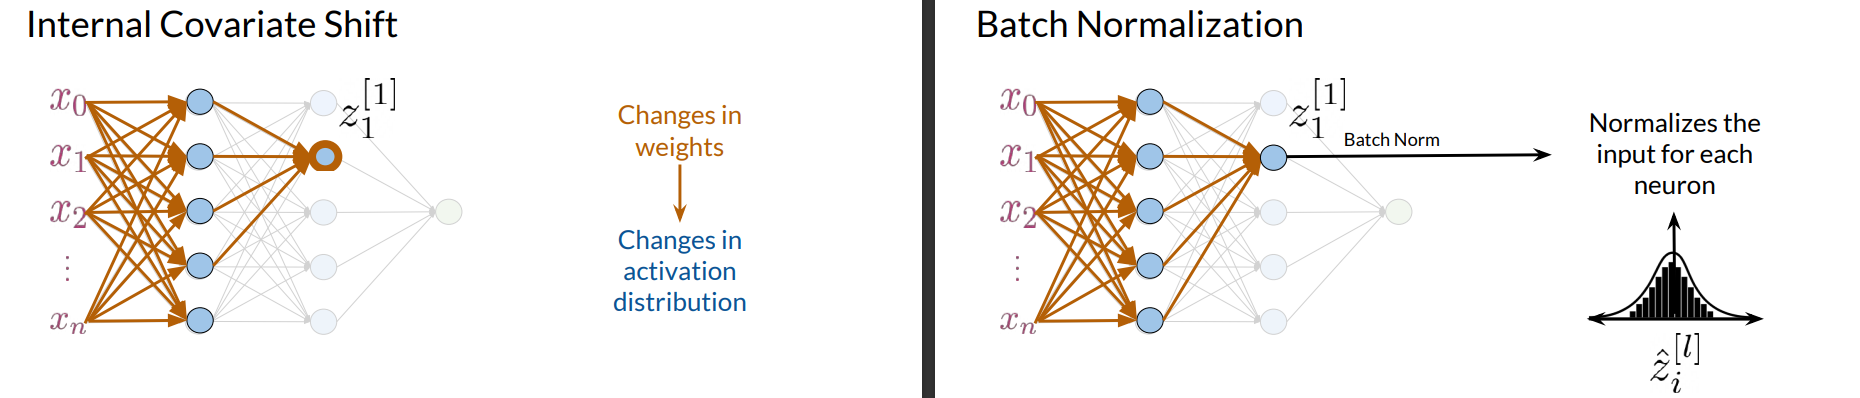

#### Batch Normalization (Procedure)


Suppose you have a layer in a neural network with $ m $ units, and $ n $ examples in a mini-batch. The inputs to this layer are denoted as $ x = \{x_1, x_2, ..., x_m\} $, where $ x_i $ represents the activations of the $ i^{th} $ unit in the layer across the mini-batch.

1. **Calculate the mean and variance**:
    - Compute the mean $ \mu $ and variance $ \sigma^2 $ of the activations across the mini-batch:
$$ \mu = \frac{1}{n} \sum_{i=1}^{n} x_i $$
$$ \sigma^2 = \frac{1}{n} \sum_{i=1}^{n} (x_i - \mu)^2 $$

2. **Normalize the activations**:
    - Normalize the activations using the mean and variance computed above:
$$ \hat{x}_i = \frac{x_i - \mu}{\sqrt{\sigma^2 + \epsilon}} $$
Where $ \epsilon $ is a small constant (usually $ 10^{-5} )$ added for numerical stability to prevent division by zero.

3. **Scale and shift**:
    - After normalization, the activations are scaled and shifted using learnable parameters $ \gamma $ and $ \beta $:
$$ y_i = \gamma \hat{x}_i + \beta $$

4. **Learnable parameters**:
    - $ \gamma $ and $ \beta $ are learned during training, allowing the model to choose the optimal scaling and shifting for each layer.

During inference (i.e., when making predictions), the mean and variance are often calculated from the entire training dataset rather than from each mini-batch, as it's impractical to compute them in real-time for each prediction.

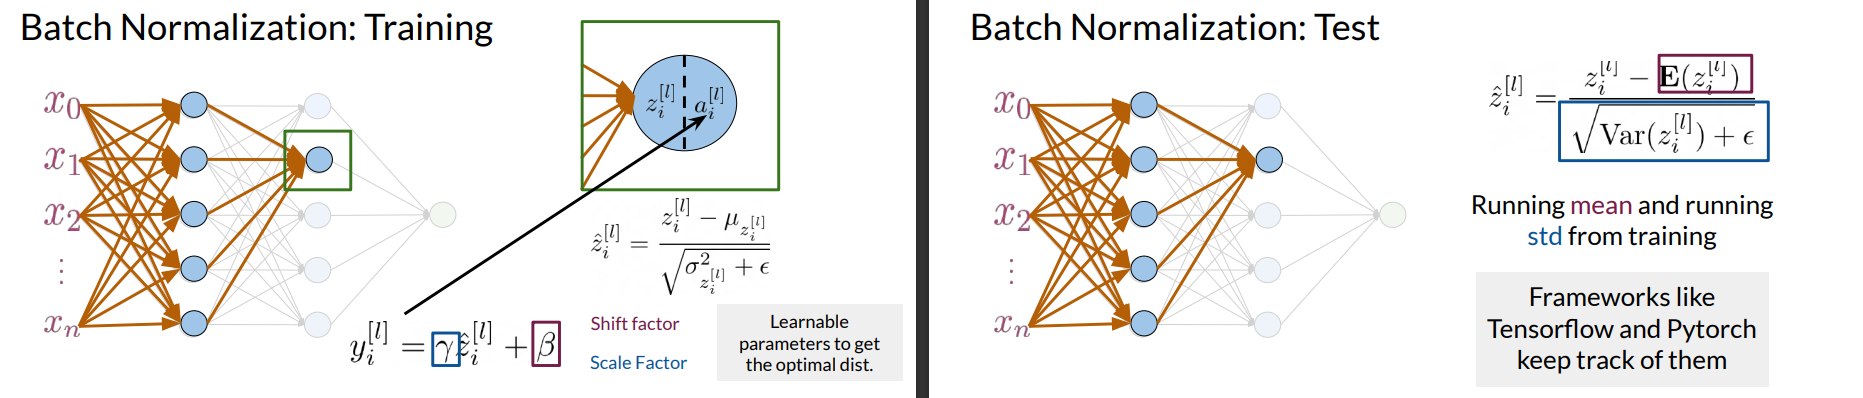

### 1.2.4 Convolution

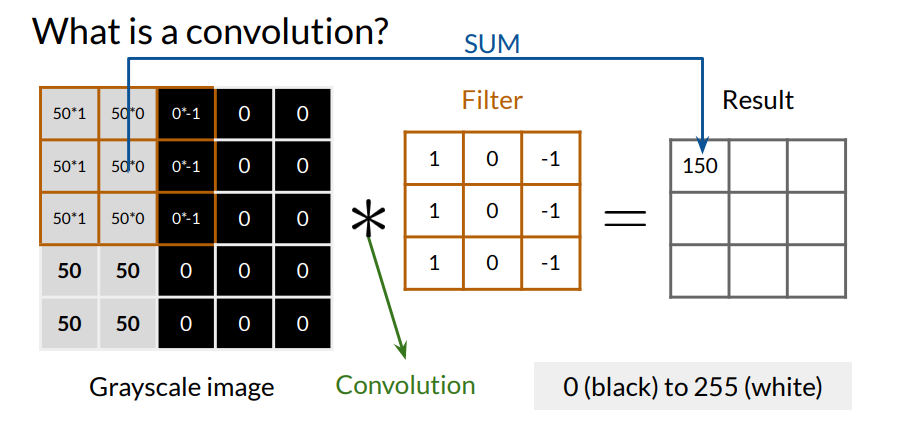

### 1.2.5 Stride

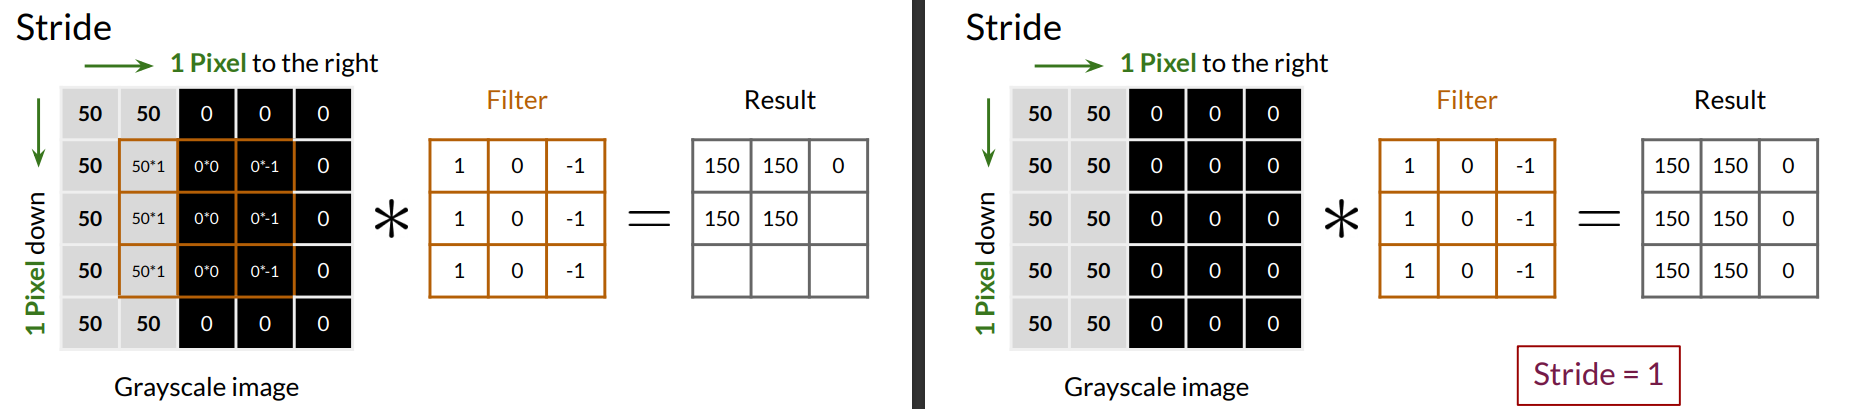

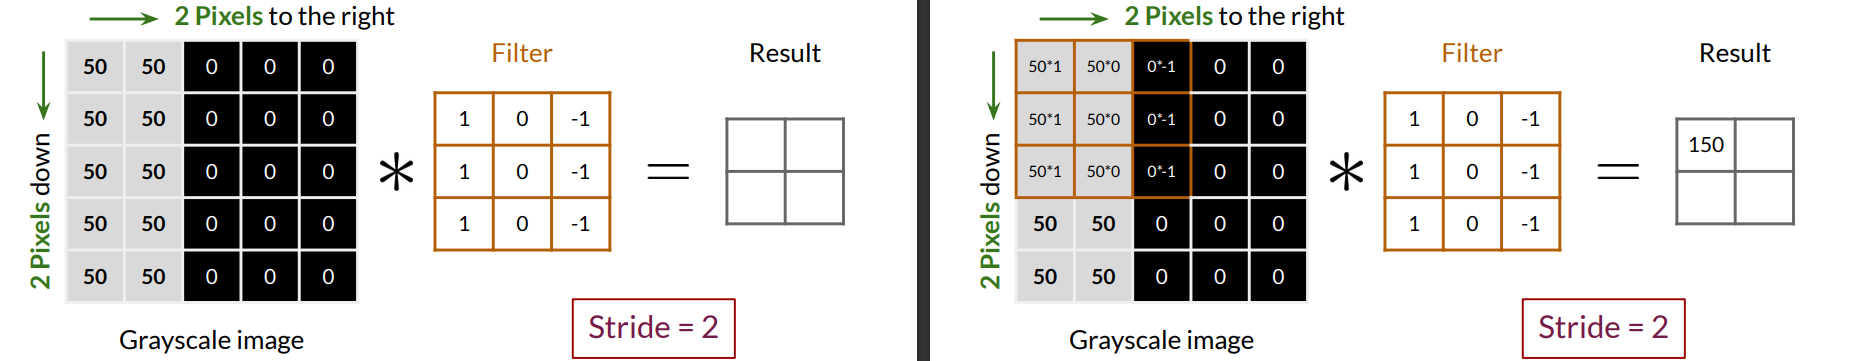

### 1.2.6 Padding

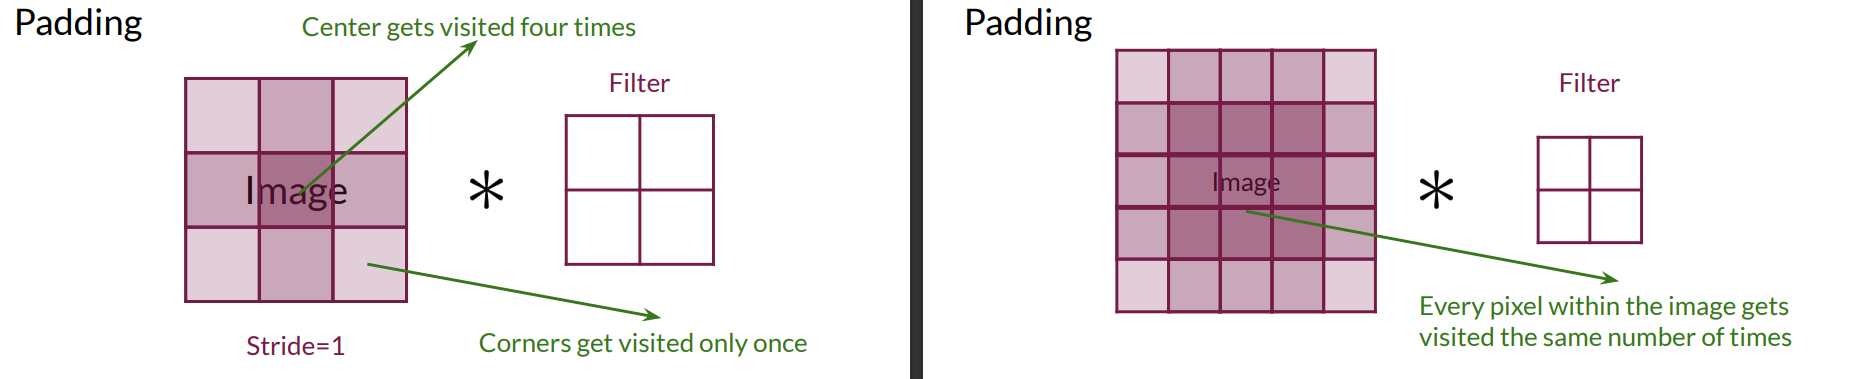

### 1.2.7 Max Pooling & Upsampling


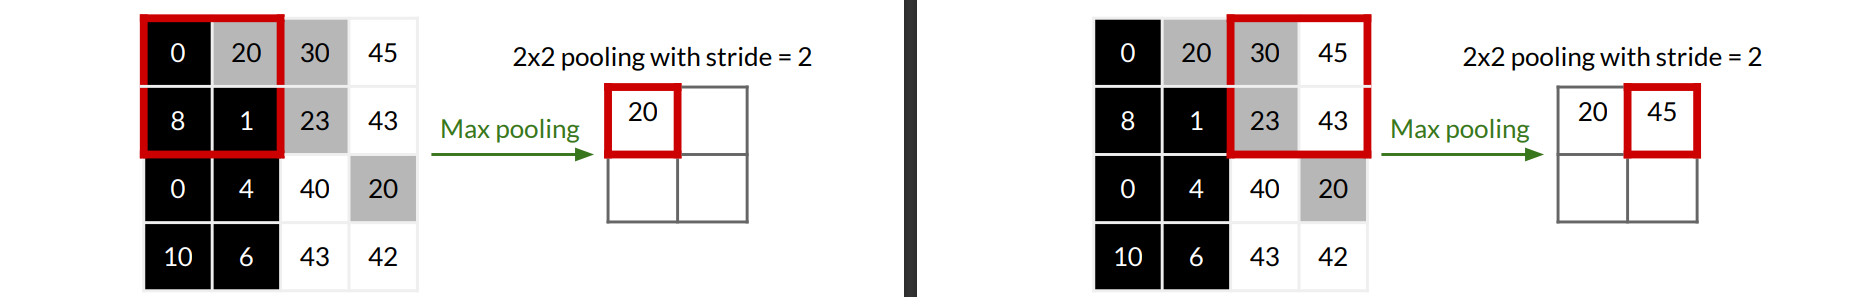

Other types include:
1. Average pooling
2. Min pooling


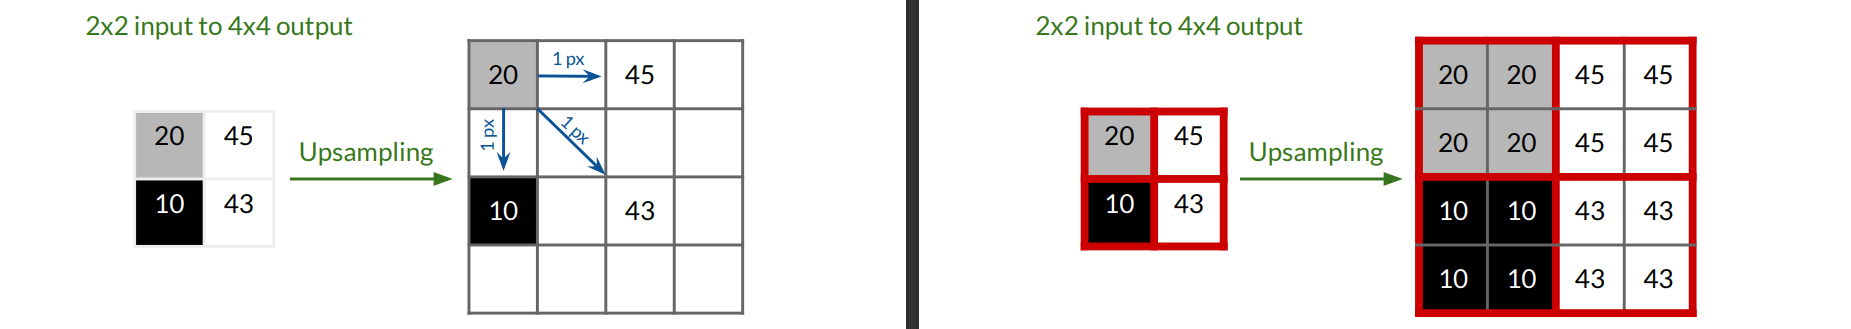

### 1.2.8 Transposed Convolutions


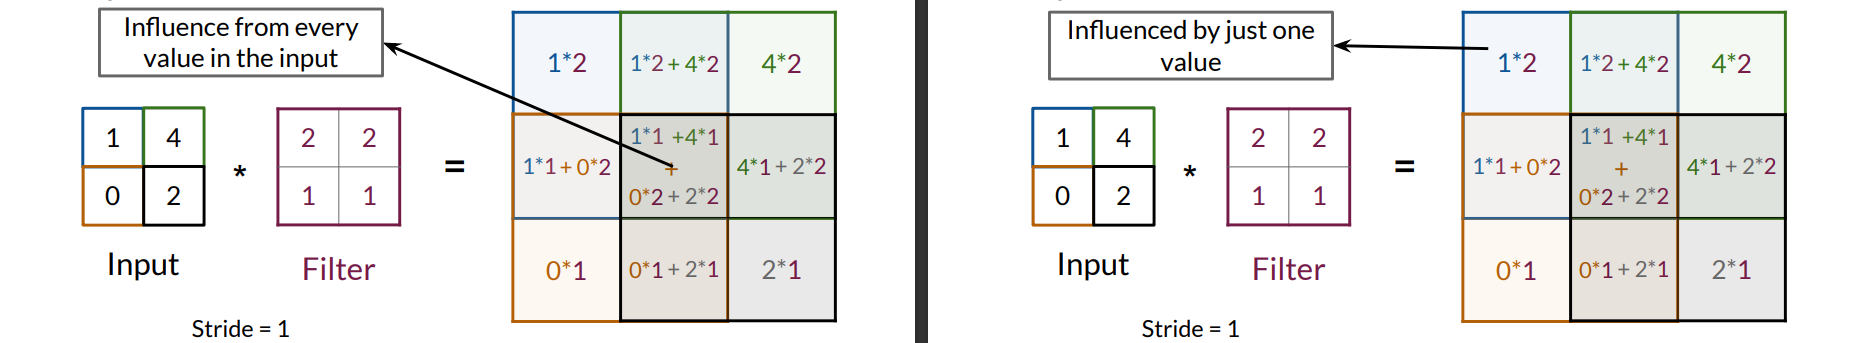

The check board pattern problem of the transpose convolution

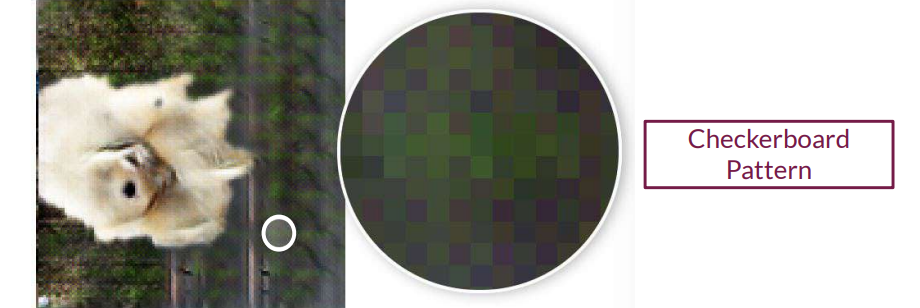

###1.2.9 Deep Convolutional GAN (DCGAN)

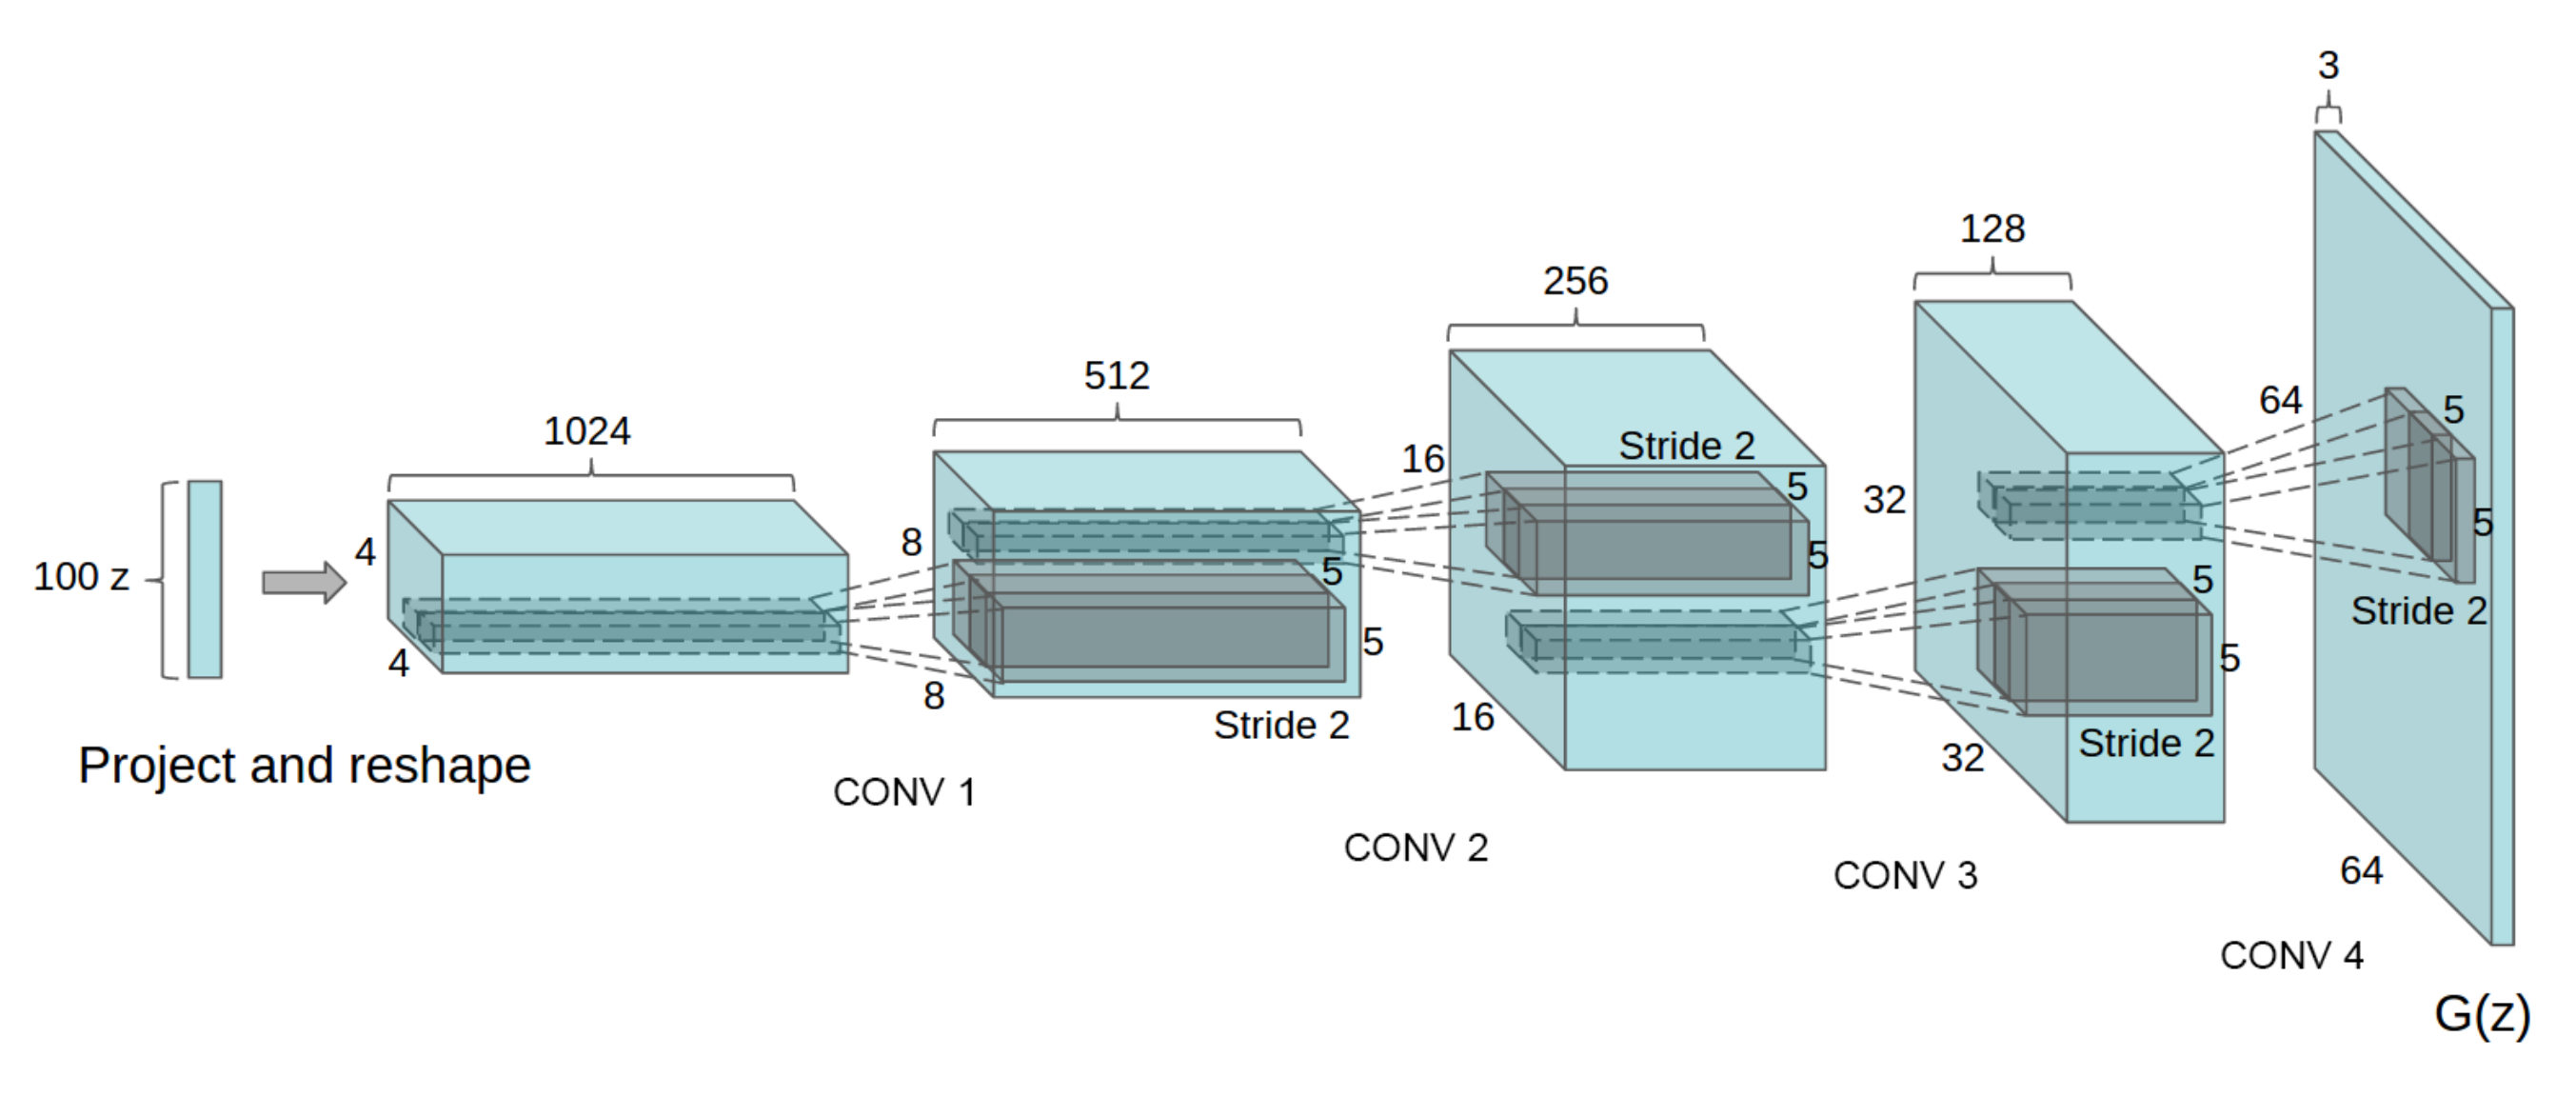

#### Imports

In [ ]:
import torch
from torch import nn
from tqdm.auto import tqdm
from torchvision import transforms
from torchvision.datasets import MNIST
from torchvision.utils import make_grid
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
torch.manual_seed(0) # Set for testing purposes, please do not change!


def show_tensor_images(image_tensor, num_images=25, size=(1, 28, 28)):
    '''
    Function for visualizing images: Given a tensor of images, number of images, and
    size per image, plots and prints the images in an uniform grid.
    '''
    image_tensor = (image_tensor + 1) / 2
    image_unflat = image_tensor.detach().cpu()
    image_grid = make_grid(image_unflat[:num_images], nrow=5)
    plt.imshow(image_grid.permute(1, 2, 0).squeeze())
    plt.show()

#### Generator

In [ ]:
class Generator(nn.Module):
    '''
    Generator Class
    Values:
        z_dim: the dimension of the noise vector, a scalar
        im_chan: the number of channels in the images, fitted for the dataset used, a scalar
              (MNIST is black-and-white, so 1 channel is your default)
        hidden_dim: the inner dimension, a scalar
    '''
    def __init__(self, z_dim=10, im_chan=1, hidden_dim=64):
        super(Generator, self).__init__()
        self.z_dim = z_dim
        # Build the neural network
        self.gen = nn.Sequential(
            self.make_gen_block(z_dim, hidden_dim * 4),
            self.make_gen_block(hidden_dim * 4, hidden_dim * 2, kernel_size=4, stride=1),
            self.make_gen_block(hidden_dim * 2, hidden_dim),
            self.make_gen_block(hidden_dim, im_chan, kernel_size=4, final_layer=True),
        )

    def make_gen_block(self, input_channels, output_channels, kernel_size=3, stride=2, final_layer=False):
        '''
        Function to return a sequence of operations corresponding to a generator block of DCGAN,
        corresponding to a transposed convolution, a batchnorm (except for in the last layer), and an activation.
        Parameters:
            input_channels: how many channels the input feature representation has
            output_channels: how many channels the output feature representation should have
            kernel_size: the size of each convolutional filter, equivalent to (kernel_size, kernel_size)
            stride: the stride of the convolution
            final_layer: a boolean, true if it is the final layer and false otherwise
                      (affects activation and batchnorm)
        '''

        #     Steps:
        #       1) Do a transposed convolution using the given parameters.
        #       2) Do a batchnorm, except for the last layer.
        #       3) Follow each batchnorm with a ReLU activation.
        #       4) If its the final layer, use a Tanh activation after the deconvolution.

        # Build the neural block
        if not final_layer:
            return nn.Sequential(
                nn.ConvTranspose2d(input_channels, output_channels, kernel_size, stride),
                nn.BatchNorm2d(output_channels),
                nn.ReLU(inplace=True)
            )
        else: # Final Layer
            return nn.Sequential(
                nn.ConvTranspose2d(input_channels, output_channels, kernel_size, stride),
                nn.Tanh(),
            )

    def unsqueeze_noise(self, noise):
        '''
        Function for completing a forward pass of the generator: Given a noise tensor,
        returns a copy of that noise with width and height = 1 and channels = z_dim.
        Parameters:
            noise: a noise tensor with dimensions (n_samples, z_dim)
        '''
        return noise.view(len(noise), self.z_dim, 1, 1)

    def forward(self, noise):
        '''
        Function for completing a forward pass of the generator: Given a noise tensor,
        returns generated images.
        Parameters:
            noise: a noise tensor with dimensions (n_samples, z_dim)
        '''
        x = self.unsqueeze_noise(noise)
        return self.gen(x)

def get_noise(n_samples, z_dim, device='cpu'):
    '''
    Function for creating noise vectors: Given the dimensions (n_samples, z_dim)
    creates a tensor of that shape filled with random numbers from the normal distribution.
    Parameters:
        n_samples: the number of samples to generate, a scalar
        z_dim: the dimension of the noise vector, a scalar
        device: the device type
    '''
    return torch.randn(n_samples, z_dim, device=device)

#### Discriminator

In [ ]:
class Discriminator(nn.Module):
    '''
    Discriminator Class
    Values:
        im_chan: the number of channels in the images, fitted for the dataset used, a scalar
              (MNIST is black-and-white, so 1 channel is your default)
    hidden_dim: the inner dimension, a scalar
    '''
    def __init__(self, im_chan=1, hidden_dim=16):
        super(Discriminator, self).__init__()
        self.disc = nn.Sequential(
            self.make_disc_block(im_chan, hidden_dim),
            self.make_disc_block(hidden_dim, hidden_dim * 2),
            self.make_disc_block(hidden_dim * 2, 1, final_layer=True),
        )

    def make_disc_block(self, input_channels, output_channels, kernel_size=4, stride=2, final_layer=False):
        '''
        Function to return a sequence of operations corresponding to a discriminator block of DCGAN,
        corresponding to a convolution, a batchnorm (except for in the last layer), and an activation.
        Parameters:
            input_channels: how many channels the input feature representation has
            output_channels: how many channels the output feature representation should have
            kernel_size: the size of each convolutional filter, equivalent to (kernel_size, kernel_size)
            stride: the stride of the convolution
            final_layer: a boolean, true if it is the final layer and false otherwise
                      (affects activation and batchnorm)
        '''
        #     Steps:
        #       1) Add a convolutional layer using the given parameters.
        #       2) Do a batchnorm, except for the last layer.
        #       3) Follow each batchnorm with a LeakyReLU activation with slope 0.2.
        #       Note: Don't use an activation on the final layer

        # Build the neural block
        if not final_layer:
            return nn.Sequential(
                nn.Conv2d(input_channels, output_channels, kernel_size, stride),
                nn.BatchNorm2d(output_channels),
                nn.LeakyReLU(0.2, inplace=True)
            )
        else: # Final Layer
            return nn.Sequential(
                nn.Conv2d(input_channels, output_channels, kernel_size, stride)
            )

    def forward(self, image):
        '''
        Function for completing a forward pass of the discriminator: Given an image tensor,
        returns a 1-dimension tensor representing fake/real.
        Parameters:
            image: a flattened image tensor with dimension (im_dim)
        '''
        disc_pred = self.disc(image)
        return disc_pred.view(len(disc_pred), -1)

#### Training

In [ ]:
criterion = nn.BCEWithLogitsLoss()
z_dim = 64
display_step = 500
batch_size = 128
# A learning rate of 0.0002 works well on DCGAN
lr = 0.0002

# These parameters control the optimizer's momentum, which you can read more about here:
# https://distill.pub/2017/momentum/ but you don’t need to worry about it for this course!
beta_1 = 0.5
beta_2 = 0.999
device = 'cuda'

# You can tranform the image values to be between -1 and 1 (the range of the tanh activation)
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,)),
])

dataloader = DataLoader(
    MNIST('.', download=True, transform=transform),
    batch_size=batch_size,
    shuffle=True)

In [ ]:
gen = Generator(z_dim).to(device)
gen_opt = torch.optim.Adam(gen.parameters(), lr=lr, betas=(beta_1, beta_2))
disc = Discriminator().to(device)
disc_opt = torch.optim.Adam(disc.parameters(), lr=lr, betas=(beta_1, beta_2))

# You initialize the weights to the normal distribution
# with mean 0 and standard deviation 0.02
def weights_init(m):
    if isinstance(m, nn.Conv2d) or isinstance(m, nn.ConvTranspose2d):
        torch.nn.init.normal_(m.weight, 0.0, 0.02)
    if isinstance(m, nn.BatchNorm2d):
        torch.nn.init.normal_(m.weight, 0.0, 0.02)
        torch.nn.init.constant_(m.bias, 0)
gen = gen.apply(weights_init)
disc = disc.apply(weights_init)

In [ ]:
n_epochs = 50
cur_step = 0
mean_generator_loss = 0
mean_discriminator_loss = 0
for epoch in range(n_epochs):
    # Dataloader returns the batches
    for real, _ in tqdm(dataloader):
        cur_batch_size = len(real)
        real = real.to(device)

        ## Update discriminator ##
        disc_opt.zero_grad()
        fake_noise = get_noise(cur_batch_size, z_dim, device=device)
        fake = gen(fake_noise)
        disc_fake_pred = disc(fake.detach())
        disc_fake_loss = criterion(disc_fake_pred, torch.zeros_like(disc_fake_pred))
        disc_real_pred = disc(real)
        disc_real_loss = criterion(disc_real_pred, torch.ones_like(disc_real_pred))
        disc_loss = (disc_fake_loss + disc_real_loss) / 2

        # Keep track of the average discriminator loss
        mean_discriminator_loss += disc_loss.item() / display_step
        # Update gradients
        disc_loss.backward(retain_graph=True)
        # Update optimizer
        disc_opt.step()

        ## Update generator ##
        gen_opt.zero_grad()
        fake_noise_2 = get_noise(cur_batch_size, z_dim, device=device)
        fake_2 = gen(fake_noise_2)
        disc_fake_pred = disc(fake_2)
        gen_loss = criterion(disc_fake_pred, torch.ones_like(disc_fake_pred))
        gen_loss.backward()
        gen_opt.step()

        # Keep track of the average generator loss
        mean_generator_loss += gen_loss.item() / display_step

        ## Visualization code ##
        if cur_step % display_step == 0 and cur_step > 0:
            print(f"Epoch {epoch}, step {cur_step}: Generator loss: {mean_generator_loss}, discriminator loss: {mean_discriminator_loss}")
            show_tensor_images(fake)
            show_tensor_images(real)
            mean_generator_loss = 0
            mean_discriminator_loss = 0
        cur_step += 1


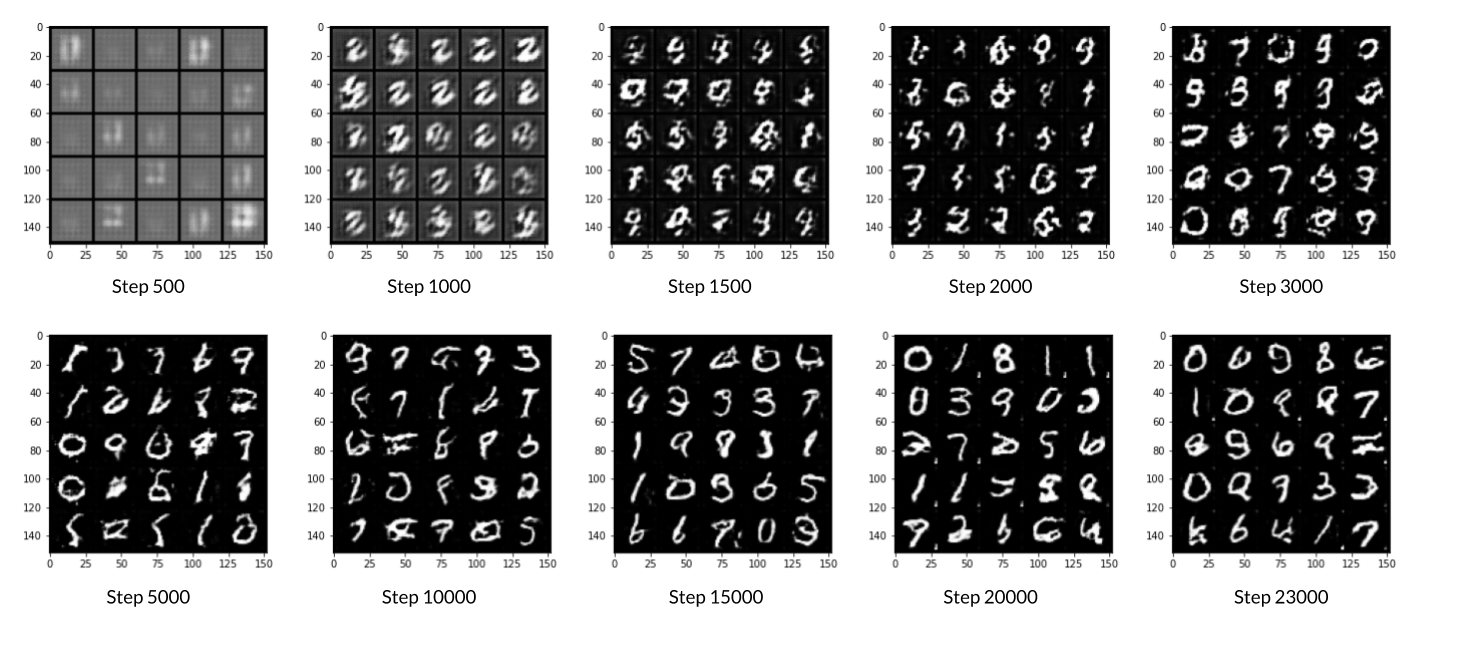

## 1.3 Wasserstein GAN (WGAN)

###1.3.1 Introduction

Wasserstein GAN (WGAN) is an advanced type of Generative Adversarial Network (GAN) designed to improve the stability of the training process and to overcome some of the issues present in traditional GANs.

1. **Motivation**: Traditional GANs often suffer from issues such as mode collapse and training instability. These problems arise partly due to the way the generator and discriminator networks are trained to optimize a binary cross-entropy loss, which can lead to vanishing gradients when the discriminator becomes too good.

2. **Wasserstein Distance**: WGAN addresses these issues by using the Wasserstein distance (also known as Earth Mover’s Distance) instead of the Jensen-Shannon divergence used in traditional GANs. The Wasserstein distance provides a more meaningful measure of the distance between the generated data distribution and the real data distribution.

3. **Critic Network**: In WGAN, the discriminator is replaced by a critic network. The critic doesn't classify samples as real or fake but instead scores them, with higher scores indicating higher resemblance to real data. The critic's goal is to provide a smooth and meaningful gradient for the generator to follow.

4. **Lipschitz Constraint**: For the Wasserstein distance to be valid, the critic function needs to be Lipschitz continuous. WGAN enforces this by clipping the weights of the critic network to a fixed range, typically [-0.01, 0.01], ensuring that the function remains within the Lipschitz constraint.

5. **Improved Stability**: By using the Wasserstein distance and maintaining the Lipschitz continuity, WGANs significantly improve the stability of the training process. They provide better gradients for the generator, reducing the likelihood of mode collapse and other training pathologies.

6. **WGAN-GP**: A later improvement, WGAN with Gradient Penalty (WGAN-GP), replaces weight clipping with a gradient penalty. This method penalizes the norm of the gradient of the critic with respect to its input, providing a more stable and effective way to enforce the Lipschitz constraint.

**References**:
- Arjovsky, M., Chintala, S., & Bottou, L. (2017). Wasserstein GAN. arXiv preprint arXiv:1701.07875.
- Gulrajani, I., Ahmed, F., Arjovsky, M., Dumoulin, V., & Courville, A. (2017). Improved Training of Wasserstein GANs. arXiv preprint arXiv:1704.00028.

### 1.3.2 Mode Collapse

Mode collapse is a common issue encountered during the training of Generative Adversarial Networks (GANs). It occurs when the generator produces a limited variety of outputs, essentially generating only a few modes (types) of data or even just a single mode, rather than capturing the full diversity of the real data distribution. This undermines the effectiveness of the GAN, as the generated data fails to represent the true diversity of the target distribution.


#### Characteristics of Mode Collapse

1. **Lack of Diversity**: The generator outputs a narrow range of samples. For example, if training a GAN to generate images of animals, a mode-collapsed GAN might only produce images of cats, neglecting other animals.
2. **Repetitive Outputs**: The samples from the generator are very similar to each other, lacking the variation present in the real data.
3. **Unstable Training**: Mode collapse can be symptomatic of instability during training, where the generator and discriminator fail to reach a balanced state.


#### Causes of Mode Collapse

1. **Imbalanced Training**: If the discriminator is too strong compared to the generator, it might provide gradients that are not informative, leading the generator to find and stick to a few "easy" modes.
2. **Optimization Issues**: Poor optimization of the generator and discriminator networks can contribute to mode collapse. This can happen due to the use of inappropriate learning rates, suboptimal network architectures, or ineffective training algorithms.
3. **Vanishing Gradients**: When the discriminator becomes too good, the gradients it provides to the generator can become very small, making it difficult for the generator to learn and explore the data distribution.


#### Strategies to Mitigate Mode Collapse

1. **Improved Objective Functions**: Using alternative objective functions, such as the Wasserstein distance in WGANs, can provide better gradients for the generator.
2. **Regularization Techniques**: Techniques such as batch normalization, gradient penalty (as in WGAN-GP), and spectral normalization can help stabilize training and promote diversity in the generated samples.
3. **Architectural Adjustments**: Designing the generator and discriminator with appropriate capacities and ensuring they are well-matched can prevent one from overpowering the other.
4. **Multi-Discriminator Approaches**: Using multiple discriminators can help in providing a more nuanced feedback to the generator, encouraging it to cover more modes of the data distribution.
5. **Minibatch Discrimination**: Techniques like minibatch discrimination allow the discriminator to consider a batch of samples rather than individual samples, encouraging the generator to produce more diverse outputs.


#### Example in Practice
Consider training a GAN to generate handwritten digits. If mode collapse occurs, the generator might produce only a limited set of digits (e.g., only the digit "1" or "7"), ignoring the rest of the digits. Despite the visual quality of these digits, the lack of diversity indicates mode collapse.

#### Detecting Mode Collapse
1. **Visualization**: Regularly visualizing the samples generated by the GAN can help in identifying a lack of diversity.
2. **Metrics**: Quantitative measures such as the Inception Score (IS) or Fréchet Inception Distance (FID) can help in evaluating the diversity and quality of the generated samples.